In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [91]:
df = pd.read_csv("census_income_dataset.csv")
df

,Unnamed: 0,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,SALARY
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


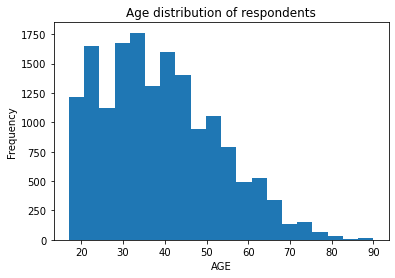

In [92]:
# plot Age distribution
df["AGE"].plot.hist(bins=20)
plt.xlabel("AGE")
plt.title('Age distribution of respondents')

# Save the plot as an SVG file
plt.savefig('AgeDistribution.svg', format='svg')

plt.show()

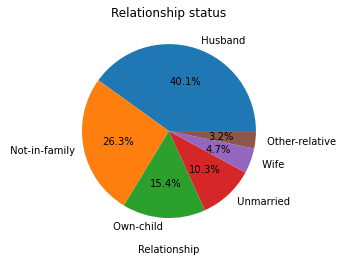

In [93]:
df["RELATIONSHIP"].value_counts().plot(kind ='pie', autopct='%1.1f%%')
, autopct='%1.1f%%'
plt.ylabel("")
plt.xlabel("Relationship")
plt.title('Relationship status')

# Save the plot as an SVG file
plt.savefig('RelationshipStatus.svg', format='svg')

plt.show()

In [94]:
df["SALARY"] = df['SALARY'].apply(lambda  x : 0  if x.strip()=='<=50K' else 1)
df

,Unnamed: 0,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,SALARY
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
16277,16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,0
16278,16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
16279,16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [95]:
print(df["SALARY"].unique())

[0 1]


In [96]:
df[["EDUCATION-NUM","SALARY"]].corr()

,EDUCATION-NUM,SALARY
EDUCATION-NUM,1.000000,0.327482
SALARY,0.327482,1.000000


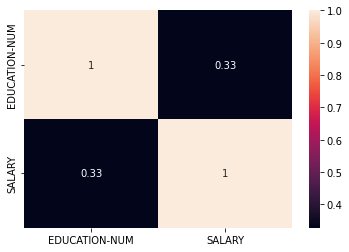

In [97]:
import seaborn
seaborn.heatmap(df[["EDUCATION-NUM","SALARY"]].corr(),annot = True)
plt.savefig("Heatmap.png")

In [98]:
# pearson's correlation using scipy
corr, p_value = pearsonr(df['EDUCATION-NUM'], df['SALARY'])
corr

0.3274820461800686

In [99]:
grouped = df.groupby(['EDUCATION', 'SALARY']).size().unstack(fill_value=0)
print(grouped)

SALARY            0     1
EDUCATION                
 10th           431    25
 11th           605    32
 12th           209    15
 1st-4th         77     2
 5th-6th        165    11
 7th-8th        287    22
 9th            228    14
 Assoc-acdm     386   148
 Assoc-voc      518   161
 Bachelors     1578  1092
 Doctorate       56   125
 HS-grad       4455   828
 Masters        434   500
 Preschool       31     1
 Prof-school     64   194
 Some-college  2911   676


In [2]:
grouped = df.groupby(['EDUCATION', 'SALARY']).size().unstack(fill_value=0)
bars = grouped.plot(kind='barh', stacked=False, width=0.8, figsize=(10,8))

plt.ylabel('Education Levels')
plt.xlabel('Count')
plt.title('Count of Salary <=50k and >50k based on Education Levels')

# Annotate each bar with count values
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', 
             ha='left', va='center', color='black')
    
# Show the plot
plt.legend(title='Salary', labels=['<=50k', '>50k'], loc='center left', bbox_to_anchor=(1, 0.5))

# Save the plot as an SVG file
plt.savefig('EducationAndSalary.svg', format='svg')

plt.show()


NameError: name 'df' is not defined

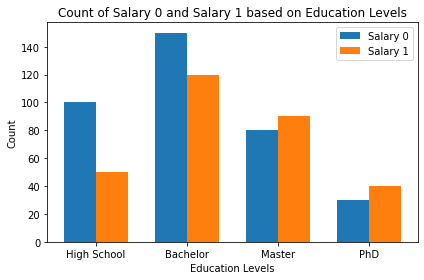

In [101]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
education_levels = ['High School', 'Bachelor', 'Master', 'PhD']
salary_0 = [100, 150, 80, 30]  # Count of salary 0 for each education level
salary_1 = [50, 120, 90, 40]   # Count of salary 1 for each education level

# Calculate the width for each bar
bar_width = 0.35
index = range(len(education_levels))

# Plotting the histogram
plt.bar(index, salary_0, width=bar_width, label='Salary 0')
plt.bar([i + bar_width for i in index], salary_1, width=bar_width, label='Salary 1')

# Add labels and title
plt.xlabel('Education Levels')
plt.ylabel('Count')
plt.title('Count of Salary 0 and Salary 1 based on Education Levels')
plt.xticks([i + bar_width / 2 for i in index], education_levels)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1152x1008 with 0 Axes>

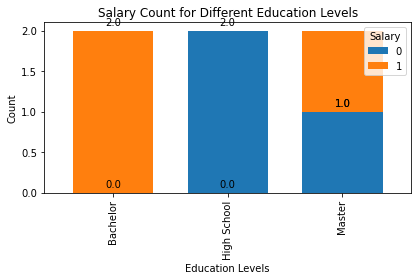

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Education': ['High School', 'Bachelor', 'Master', 'High School', 'Master', 'Bachelor'],
    'Salary': [0, 1, 1, 0, 0, 1]
}
df4 = pd.DataFrame(data)

# Grouping the data by 'Education' and 'Salary' columns and getting counts
grouped = df4.groupby(['Education', 'Salary']).size().unstack(fill_value=0)

# Increase the size of bars and the figure
plt.figure(figsize=(16, 14))  # Set the figure size (adjust as needed)
bars = grouped.plot(kind='bar', stacked=True, width=0.7)  # Adjust bar width as needed

# Add labels and title
plt.xlabel('Education Levels')
plt.ylabel('Count')
plt.title('Salary Count for Different Education Levels')
plt.legend(title='Salary')

# Annotate each bar with count values
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


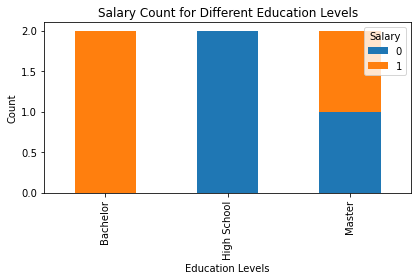

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Education': ['High School', 'Bachelor', 'Master', 'High School', 'Master', 'Bachelor'],
    'Salary': [0, 1, 1, 0, 0, 1]
}
df3 = pd.DataFrame(data)

# Grouping the data by 'Education' and 'Salary' columns and getting counts
grouped = df3.groupby(['Education', 'Salary']).size().unstack(fill_value=0)

# Plotting the histogram
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Education Levels')
plt.ylabel('Count')
plt.title('Salary Count for Different Education Levels')
plt.legend(title='Salary')

# Show the plot
plt.tight_layout()
plt.show()
